# 2018 Yellow Taxi Trip Data Analysis

- Read taxi-sample and shape files
- Data cleaning (removing null values, trip duration 0 etc.)

In [1]:
import pandas as pd
import numpy as np
import shapefile
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import math

In [2]:
taxiSample = pd.read_csv("data/taxi-sample.csv")
taxiSample[105:110]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
105,2,03/12/2019 11:12:48 PM,03/12/2019 11:23:38 PM,1,1.10,1,N,137,113,1,8.5,0.0,0.5,1.86,0.0,0.3,11.16
106,2,03/07/2019 06:25:03 AM,03/07/2019 03:25:31 PM,1,8.66,1,N,163,54,1,38.0,0.0,0.5,7.76,0.0,0.3,46.56
107,2,03/04/2019 12:35:59 PM,03/04/2019 01:07:03 PM,2,5.52,1,N,50,179,1,23.0,0.0,0.5,0.00,0.0,0.3,23.80
108,2,03/04/2019 12:13:56 AM,03/04/2019 12:32:39 AM,5,11.94,1,N,70,265,2,32.5,0.0,0.5,0.00,0.0,0.3,33.30
109,2,03/03/2019 03:27:20 AM,03/03/2019 12:01:14 PM,1,6.37,1,N,170,13,1,27.0,0.0,0.5,4.50,0.0,0.3,32.30


In [3]:
%%time
taxiSample['tpep_pickup_datetime'] = pd.to_datetime(taxiSample['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
taxiSample['tpep_dropoff_datetime'] = pd.to_datetime(taxiSample['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

CPU times: user 6.87 s, sys: 12.8 ms, total: 6.88 s
Wall time: 6.87 s


In [4]:
taxiSample["pickup_weekday"] = taxiSample.tpep_pickup_datetime.dt.weekday_name
taxiSample["pickup_hour"] = taxiSample.tpep_pickup_datetime.dt.hour
taxiSample["pickup_month"] = taxiSample.tpep_pickup_datetime.dt.month
taxiSample["pickup_year"] = taxiSample.tpep_pickup_datetime.dt.year

In [5]:
taxiSample["dropoff_weekday"] = taxiSample.tpep_dropoff_datetime.dt.weekday_name
taxiSample["dropoff_hour"] = taxiSample.tpep_dropoff_datetime.dt.hour
taxiSample["dropoff_month"] = taxiSample.tpep_dropoff_datetime.dt.month
taxiSample["dropoff_year"] = taxiSample.tpep_dropoff_datetime.dt.year

In [6]:
taxiSample[105:110]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,pickup_weekday,pickup_hour,pickup_month,pickup_year,dropoff_weekday,dropoff_hour,dropoff_month,dropoff_year
105,2,2019-03-12 23:12:48,2019-03-12 23:23:38,1,1.10,1,N,137,113,1,...,0.3,11.16,Tuesday,23,3,2019,Tuesday,23,3,2019
106,2,2019-03-07 06:25:03,2019-03-07 15:25:31,1,8.66,1,N,163,54,1,...,0.3,46.56,Thursday,6,3,2019,Thursday,15,3,2019
107,2,2019-03-04 12:35:59,2019-03-04 13:07:03,2,5.52,1,N,50,179,1,...,0.3,23.80,Monday,12,3,2019,Monday,13,3,2019
108,2,2019-03-04 00:13:56,2019-03-04 00:32:39,5,11.94,1,N,70,265,2,...,0.3,33.30,Monday,0,3,2019,Monday,0,3,2019
109,2,2019-03-03 03:27:20,2019-03-03 12:01:14,1,6.37,1,N,170,13,1,...,0.3,32.30,Sunday,3,3,2019,Sunday,12,3,2019


In [7]:
print(taxiSample.shape)

(1048576, 25)


## Data Cleaning

### Checking if there is any null value in the dataset

In [8]:
taxiSample.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
pickup_weekday           False
pickup_hour              False
pickup_month             False
pickup_year              False
dropoff_weekday          False
dropoff_hour             False
dropoff_month            False
dropoff_year             False
dtype: bool

### Removing rows with trip distance 0 or less

In [9]:
trip_dist = taxiSample[taxiSample.trip_distance <= 0.0]
trip_dist.shape

(8463, 25)

In [10]:
taxiSample = taxiSample[taxiSample.trip_distance > 0.0]
taxiSample.shape

(1040113, 25)

### Removing rows with passenger count 0 or less

In [11]:
pass_count = taxiSample[taxiSample.passenger_count <= 0]
pass_count.shape

(15039, 25)

In [12]:
taxiSample = taxiSample[taxiSample.passenger_count > 0]
taxiSample.shape

(1025074, 25)

### Removing duplicate rows

In [13]:
duplicate = taxiSample[taxiSample.duplicated()]
duplicate.shape

(21, 25)

In [14]:
taxiSample.drop_duplicates(keep='first', inplace=True)
taxiSample.shape

(1025053, 25)

### Removing rows with same pickup and dropoff time

In [15]:
same_pick_drop = taxiSample[taxiSample.tpep_pickup_datetime==taxiSample.tpep_dropoff_datetime]
same_pick_drop.shape

(46, 25)

In [16]:
taxiSample = taxiSample[taxiSample.tpep_pickup_datetime!=taxiSample.tpep_dropoff_datetime]
taxiSample.shape

(1025007, 25)

### Removing rows with future dates

In [17]:
print("Train dataset start date: ", min(taxiSample["tpep_pickup_datetime"]))
print("Train dataset end date: ", max(taxiSample["tpep_dropoff_datetime"]))

Train dataset start date:  2018-12-27 00:05:14
Train dataset end date:  2084-11-04 12:47:41


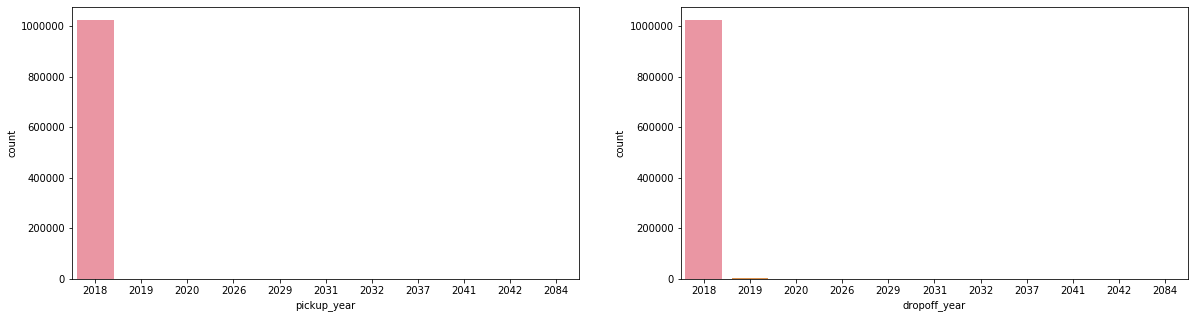

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='pickup_year', data=taxiSample, ax=ax[0])
sns.countplot(x='dropoff_year', data=taxiSample, ax=ax[1])
plt.show()

In [19]:
taxiSample.groupby('pickup_year')['pickup_year'].count()

pickup_year
2018    1024804
2019        175
2020         10
2026          2
2029          2
2031          2
2032          1
2037          1
2041          1
2042          1
2084          8
Name: pickup_year, dtype: int64

#### We are assuming limit for date is: "2019-06-30 23:59:59" and remove all the future dates

In [20]:
taxiSample = taxiSample[taxiSample.tpep_pickup_datetime<="2019-06-30 23:59:59"]
taxiSample.shape

(1024969, 25)

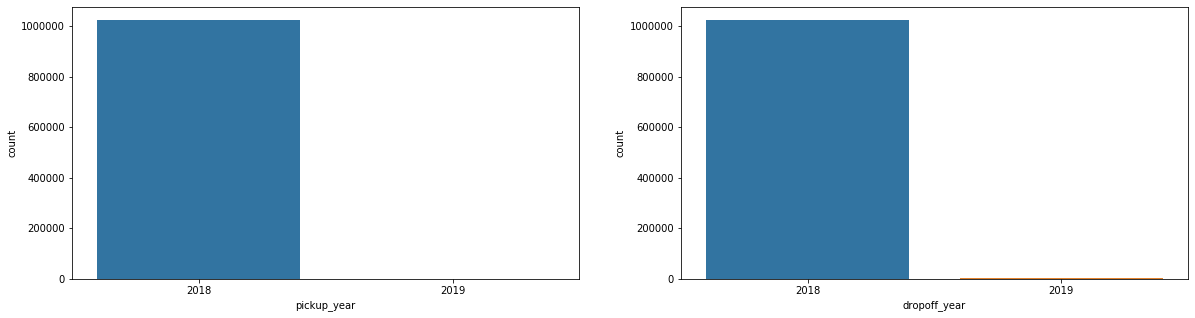

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='pickup_year', data=taxiSample, ax=ax[0])
sns.countplot(x='dropoff_year', data=taxiSample, ax=ax[1])
plt.show()

### Removing rows that have RatecodeID>6

In [22]:
ratecode_count = taxiSample.groupby('RatecodeID')['RatecodeID'].count()
ratecode_count

RatecodeID
1     991516
2      25862
3       1674
4        652
5       5253
6          2
99        10
Name: RatecodeID, dtype: int64

In [23]:
taxiSample = taxiSample[taxiSample.RatecodeID<=6]
taxiSample.shape

(1024959, 25)

### Checking amounts for negative or zero values

In [24]:
taxiSample[taxiSample.fare_amount<=0.0].shape

(1029, 25)

In [25]:
taxiSample[taxiSample.tip_amount<0.0].shape

(5, 25)

In [26]:
taxiSample[taxiSample.tolls_amount<0.0].shape

(17, 25)

In [27]:
taxiSample[taxiSample.total_amount<=0.0].shape

(902, 25)

In [28]:
taxiSample[taxiSample.extra<0.0].shape

(440, 25)

In [29]:
taxiSample[taxiSample.mta_tax<0.0].shape

(856, 25)

In [30]:
taxiSample[taxiSample.improvement_surcharge<0.0].shape

(871, 25)

In [31]:
taxiSample = taxiSample[taxiSample.fare_amount>0.0]
taxiSample = taxiSample[taxiSample.tip_amount>=0.0]
taxiSample = taxiSample[taxiSample.tolls_amount>=0.0]
taxiSample = taxiSample[taxiSample.total_amount>0.0]
taxiSample = taxiSample[taxiSample.extra>=0.0]
taxiSample = taxiSample[taxiSample.mta_tax>=0.0]
taxiSample = taxiSample[taxiSample.improvement_surcharge>=0.0]
taxiSample.shape

(1023929, 25)

# Insights on different attributes

### Which vendor has the most data record?

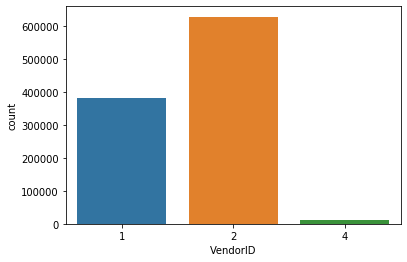

In [32]:
sns.countplot(x="VendorID", data=taxiSample)

In [33]:
taxiSample.groupby('VendorID')['VendorID'].count()

VendorID
1    382776
2    629115
4     12038
Name: VendorID, dtype: int64

### What is the most frequent passenger number?

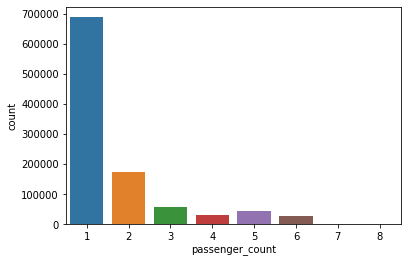

In [34]:
sns.countplot(x="passenger_count", data=taxiSample)

In [35]:
taxiSample.groupby('passenger_count')['passenger_count'].count()

passenger_count
1    687480
2    174715
3     56102
4     32674
5     45300
6     27653
7         2
8         3
Name: passenger_count, dtype: int64

### What is the percentage of store and forward trip?

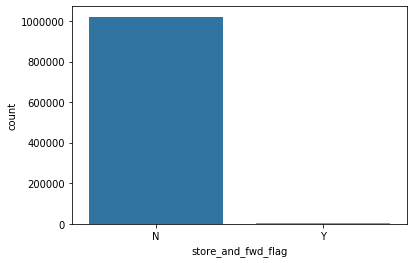

In [36]:
sns.countplot(x="store_and_fwd_flag", data=taxiSample)

In [37]:
taxiSample.groupby('store_and_fwd_flag')['store_and_fwd_flag'].count()

store_and_fwd_flag
N    1020226
Y       3703
Name: store_and_fwd_flag, dtype: int64

In [38]:
temp_flag = taxiSample[taxiSample.store_and_fwd_flag=='N']
(temp_flag.shape[0]*100) / taxiSample.shape[0]  # percentage of record that are N

99.63835383117384

### What is the most popular payment method?

payment_type is a numeric code signifying how the passenger paid for the trip:

* 1=Credit card
* 2=Cash
* 3=No charge
* 4=Dispute

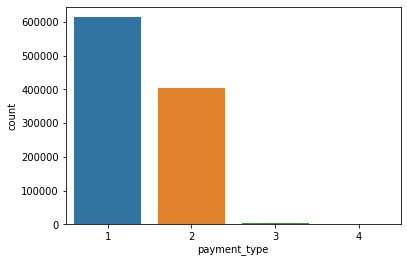

In [39]:
sns.countplot(x="payment_type", data=taxiSample)

In [40]:
taxiSample.groupby('payment_type')['payment_type'].count()

payment_type
1    613177
2    405198
3      4084
4      1470
Name: payment_type, dtype: int64

### Which day of the week has most pickup/dropoff?

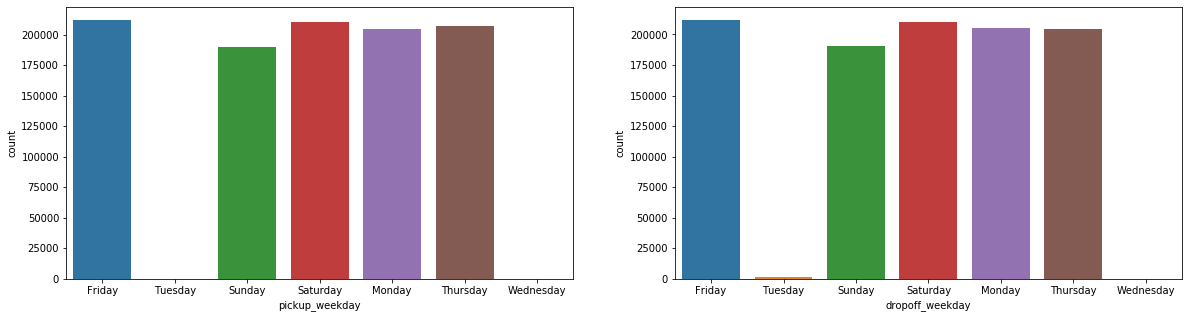

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_weekday", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_weekday", data=taxiSample, ax=ax[1])
plt.show()

### Which time of the day has most pickup/dropoff?

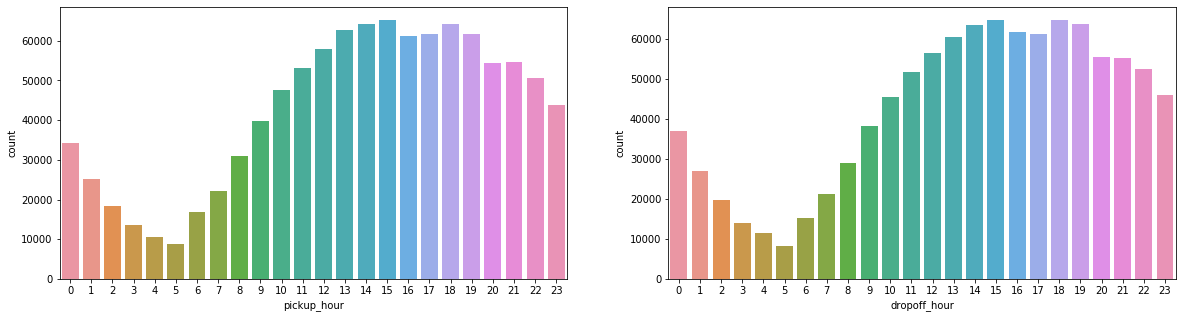

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_hour", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_hour", data=taxiSample, ax=ax[1])
plt.show()

### Which month has the most pickup/dropoff?

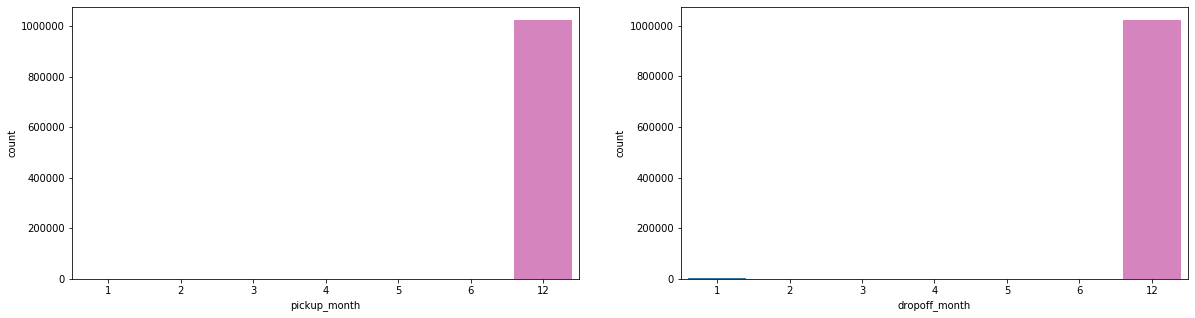

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_month", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_month", data=taxiSample, ax=ax[1])
plt.show()

### Insights related to trip duration

In [44]:
taxiSample['trip_duration'] = (taxiSample.tpep_dropoff_datetime - taxiSample.tpep_pickup_datetime).dt.total_seconds()

In [45]:
taxiSample.trip_duration.describe()

count    1.023929e+06
mean     1.116260e+03
std      4.988527e+03
min      1.000000e+00
25%      3.720000e+02
50%      6.430000e+02
75%      1.084000e+03
max      8.639400e+04
Name: trip_duration, dtype: float64

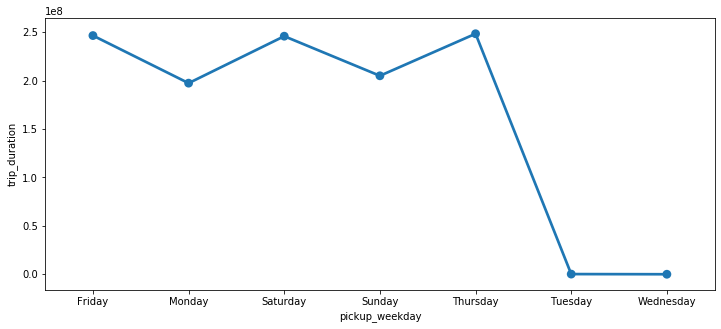

In [46]:
df_train_agg = taxiSample.groupby('pickup_weekday')['trip_duration'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.pointplot(df_train_agg.pickup_weekday, df_train_agg.trip_duration)
plt.show()

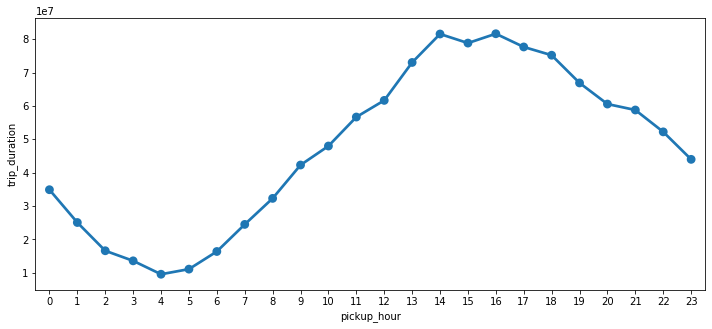

In [47]:
df_train_agg = taxiSample.groupby('pickup_hour')['trip_duration'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.pointplot(df_train_agg.pickup_hour, df_train_agg.trip_duration)
plt.show()

### Insights related to trip distance

In [48]:
taxiSample['trip_distance'].describe()

count    1.023929e+06
mean     3.061509e+00
std      3.970562e+00
min      1.000000e-02
25%      9.700000e-01
50%      1.650000e+00
75%      3.150000e+00
max      1.405800e+02
Name: trip_distance, dtype: float64

In [49]:
short_distance = taxiSample[taxiSample.trip_distance<25.0]
long_distance = taxiSample[taxiSample.trip_distance>=25.0]
print(short_distance.shape)
print(long_distance.shape)

(1022560, 26)
(1369, 26)


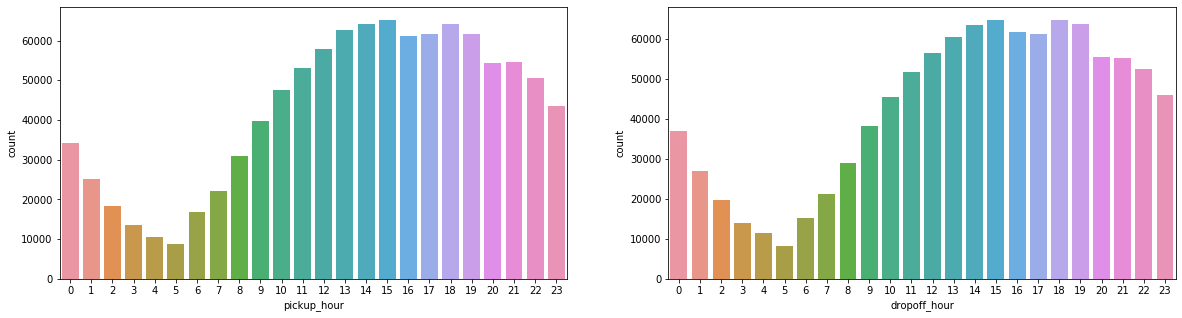

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_hour", data=short_distance, ax=ax[0])
sns.countplot(x="dropoff_hour", data=short_distance, ax=ax[1])
plt.show()

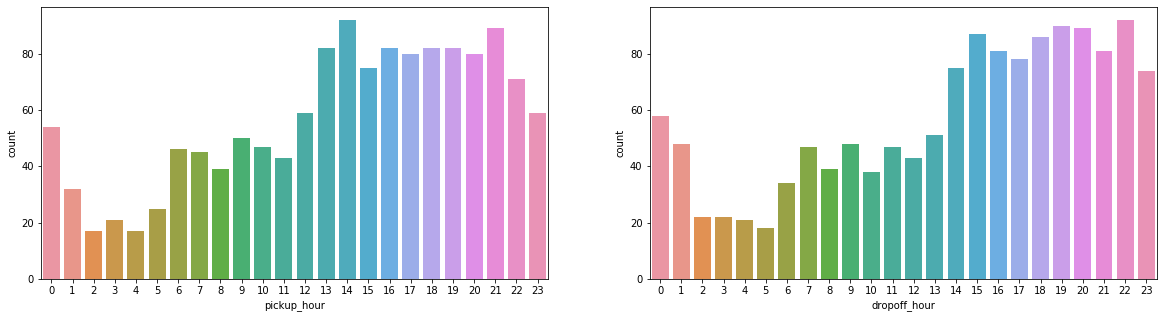

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_hour", data=long_distance, ax=ax[0])
sns.countplot(x="dropoff_hour", data=long_distance, ax=ax[1])
plt.show()

### Traffic condition in a day

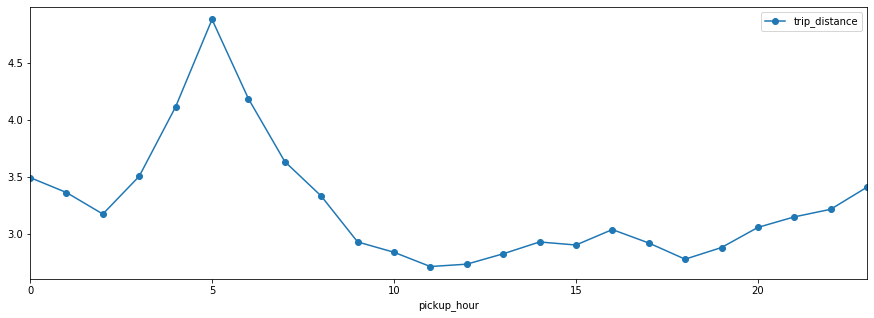

In [52]:
traffic = taxiSample.groupby('pickup_hour')['trip_distance','trip_duration'].mean().reset_index()
ax = traffic.plot(x='pickup_hour', y='trip_distance', kind='line', style="-o", figsize=(15,5))
plt.show()

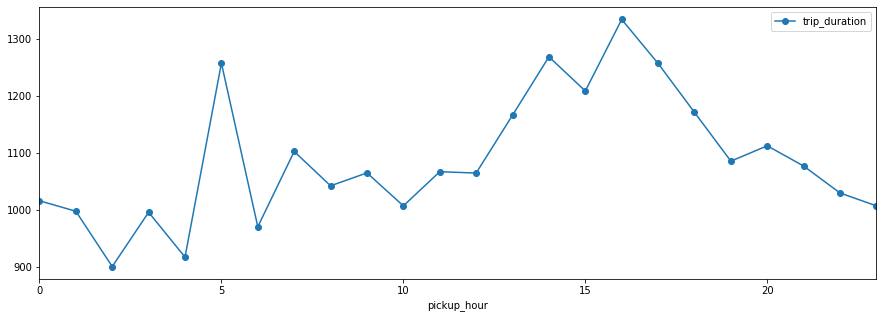

In [53]:
ax = traffic.plot(x='pickup_hour', y=['trip_duration'], kind='line', style="-o", figsize=(15,5))
plt.show()

## Loading shape file to display borough and zones

In [54]:
taxiZones = shapefile.Reader("data/taxi_zones/taxi_zones.shp")
fields_name = [field[0] for field in taxiZones.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))

attributes = taxiZones.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]
print(shp_attr[:2])

[{'OBJECTID': 1, 'Shape_Leng': 0.116357453189, 'Shape_Area': 0.0007823067885, 'zone': 'Newark Airport', 'LocationID': 1, 'borough': 'EWR'}, {'OBJECTID': 2, 'Shape_Leng': 0.43346966679, 'Shape_Area': 0.00486634037837, 'zone': 'Jamaica Bay', 'LocationID': 2, 'borough': 'Queens'}]


In [55]:
def get_lat_lon(taxiZones):
    content = []
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [56]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(taxiZones).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


In [57]:
boroughs = df_loc['borough'].unique()
print(boroughs)

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn']


In [58]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [59]:
def draw_region_map(ax, taxiZones, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'EWR':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'Staten Island':5, 'Brooklyn':6}
    reg_x = {'EWR':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'Staten Island':[], 'Brooklyn':[]}
    reg_y = {'EWR':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'Staten Island':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values())))
        cm=plt.get_cmap('Reds')
    
    ax.set_facecolor(ocean)
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center',
                     verticalalignment='center', bbox=dict(facecolor='black', alpha=0.5),
                     color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000),
                     horizontalalignment='center', verticalalignment='center',
                     bbox=dict(facecolor='black', alpha=0.7), color="white", fontsize=12)       

    # display
    limits = get_boundaries(taxiZones)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [60]:
def draw_zone_map(ax, taxiZones, heat={}, text=[], arrows=[]):
    continent = [180/256, 50/256, 50/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values()))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.7), color="white", fontsize=8,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(taxiZones)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

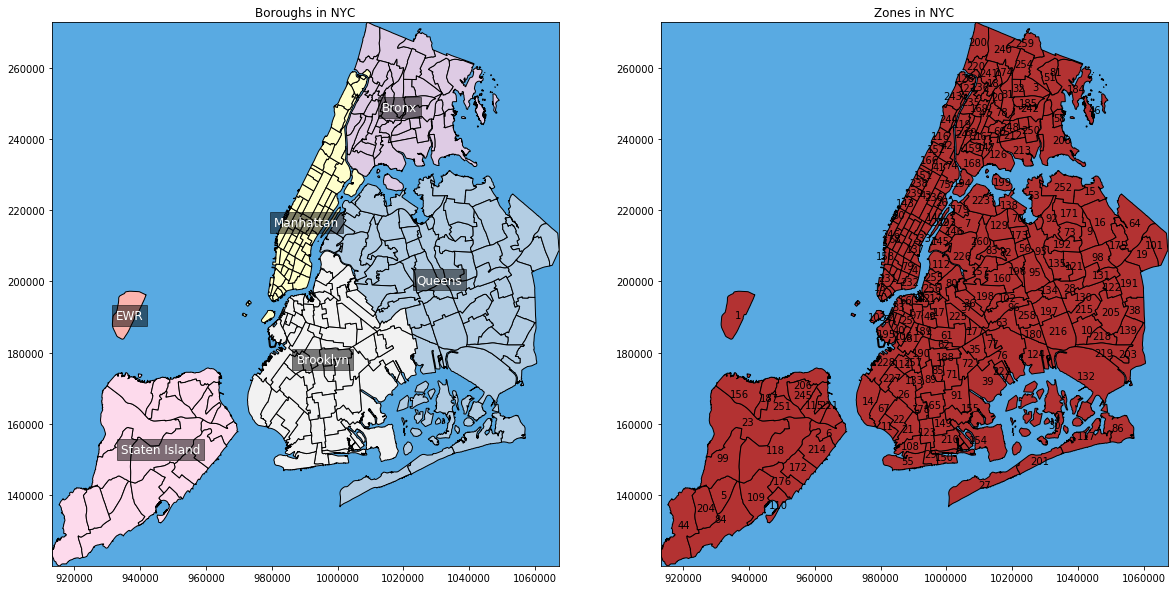

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, taxiZones)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, taxiZones)

In [62]:
pu_location = taxiSample.groupby('PULocationID')['PULocationID'].count().reset_index(name='puCount').rename(columns={'PULocationID':'LocationID'})
do_location = taxiSample.groupby('DOLocationID')['DOLocationID'].count().reset_index(name='doCount').rename(columns={'DOLocationID':'LocationID'})

In [63]:
pu_do_location = df_loc.merge(pu_location, on='LocationID', how='left')
pu_do_location

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude,puCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278,26.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300,1.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849,27.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432,2224.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936,1.0
...,...,...,...,...,...,...,...,...,...
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718,44.0
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136,702.0
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456,7758.0
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595,11503.0


In [64]:
pu_do_location = pu_do_location.merge(do_location, on='LocationID', how='left')
pu_do_location

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude,puCount,doCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278,26.0,1489.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300,1.0,1.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849,27.0,89.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432,2224.0,5450.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718,44.0,176.0
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136,702.0,1434.0
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456,7758.0,6037.0
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595,11503.0,12644.0


In [65]:
pu_do_location['totalCount'] = pu_do_location['puCount'] + pu_do_location['doCount']
pu_do_location

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude,puCount,doCount,totalCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278,26.0,1489.0,1515.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300,1.0,1.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849,27.0,89.0,116.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432,2224.0,5450.0,7674.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936,1.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718,44.0,176.0,220.0
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136,702.0,1434.0,2136.0
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456,7758.0,6037.0,13795.0
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595,11503.0,12644.0,24147.0


In [66]:
puCount = dict(zip(pu_do_location['LocationID'].tolist(), pu_do_location['puCount'].tolist()))
puTop5 = pu_do_location.sort_values(by=['puCount'], ascending=False).set_index("LocationID").head(5)
doCount = dict(zip(pu_do_location['LocationID'].tolist(), pu_do_location['doCount'].tolist()))
doTop5 = pu_do_location.sort_values(by=['doCount'], ascending=False).set_index("LocationID").head(5)

In [67]:
puTop5

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount,totalCount
LocationID,,,,,,,,,,
186,186,0.024696,0.000037,Penn Station/Madison Sq West,Manhattan,9.863463e+05,211974.157667,42393.0,28021.0,70414.0
48,48,0.043747,0.000094,Clinton East,Manhattan,9.870655e+05,216984.693458,38160.0,34033.0,72193.0
237,237,0.042213,0.000096,Upper East Side South,Manhattan,9.937688e+05,219305.448647,36727.0,32739.0,69466.0
161,161,0.035804,0.000072,Midtown Center,Manhattan,9.904334e+05,215448.355221,36309.0,37034.0,73343.0
132,132,0.245479,0.002038,JFK Airport,Queens,1.042628e+06,173494.353508,33224.0,7618.0,40842.0


In [68]:
doTop5

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount,totalCount
LocationID,,,,,,,,,,
161,161,0.035804,0.000072,Midtown Center,Manhattan,990433.407940,215448.355221,36309.0,37034.0,73343.0
48,48,0.043747,0.000094,Clinton East,Manhattan,987065.467994,216984.693458,38160.0,34033.0,72193.0
236,236,0.044252,0.000103,Upper East Side North,Manhattan,996155.897922,223614.973989,32558.0,33913.0,66471.0
237,237,0.042213,0.000096,Upper East Side South,Manhattan,993768.783313,219305.448647,36727.0,32739.0,69466.0
170,170,0.045769,0.000074,Murray Hill,Manhattan,990443.335463,211693.748324,30205.0,30108.0,60313.0


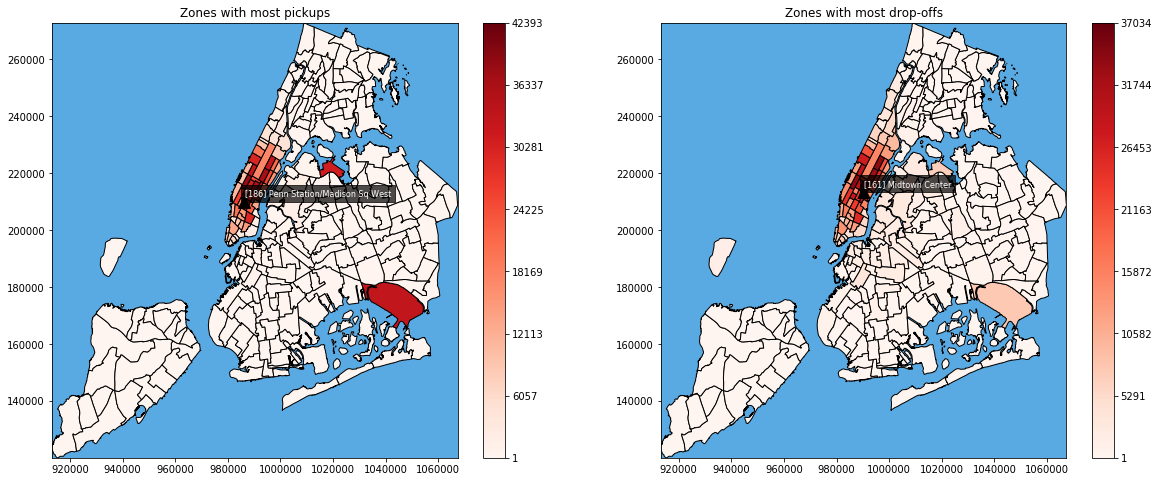

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Zones with most pickups")
draw_zone_map(ax, taxiZones, heat=puCount, text=puTop5[0:1].index.tolist())
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones with most drop-offs")
draw_zone_map(ax, taxiZones, heat=doCount, text=doTop5[0:1].index.tolist())

In [70]:
pu_do_region = pu_do_location.groupby('borough')[['puCount','doCount','totalCount']].sum().reset_index().sort_values(by='totalCount', ascending=False)
pu_do_region

,borough,puCount,doCount,totalCount
3,Manhattan,915795.0,898385.0,1814180.0
4,Queens,76854.0,50622.0,127458.0
1,Brooklyn,12796.0,48008.0,60804.0
0,Bronx,2229.0,9181.0,11383.0
2,EWR,26.0,1489.0,1515.0
5,Staten Island,51.0,273.0,288.0


In [71]:
poCount = dict(zip(pu_do_region['borough'].tolist(), pu_do_region['puCount'].tolist()))
doCount = dict(zip(pu_do_region['borough'].tolist(), pu_do_region['doCount'].tolist()))

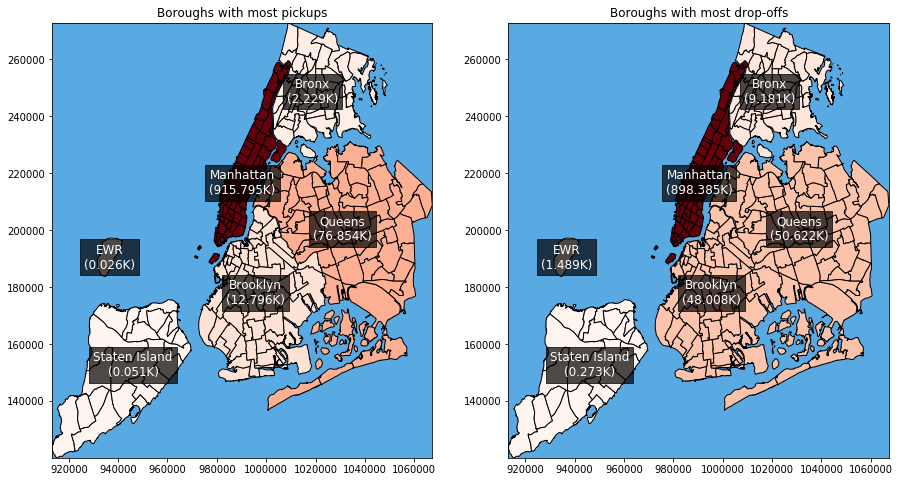

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs with most pickups")
draw_region_map(ax, taxiZones, heat = poCount)
ax = plt.subplot(1, 2, 2)
ax.set_title("Boroughs with most drop-offs")
draw_region_map(ax, taxiZones, heat = doCount)

In [73]:
pu_location_short = taxiSample[taxiSample.trip_distance<20].groupby('PULocationID')['PULocationID'].count().reset_index(name='puCount').rename(columns={'PULocationID':'LocationID'})
do_location_short = taxiSample[taxiSample.trip_distance<20].groupby('DOLocationID')['DOLocationID'].count().reset_index(name='doCount').rename(columns={'DOLocationID':'LocationID'})

pu_do_location_short = df_loc.merge(pu_location_short, on='LocationID', how='left')
pu_do_location_short = pu_do_location_short.merge(do_location_short, on='LocationID', how='left')
pu_do_location_short.fillna(0)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude,puCount,doCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278,24.0,1204.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300,0.0,1.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849,26.0,85.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432,2218.0,5442.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718,38.0,142.0
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136,700.0,1433.0
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456,7704.0,5862.0
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595,11486.0,12635.0


In [74]:
pu_location_long = taxiSample[taxiSample.trip_distance>=20].groupby('PULocationID')['PULocationID'].count().reset_index(name='puCount').rename(columns={'PULocationID':'LocationID'})
do_location_long = taxiSample[taxiSample.trip_distance>=20].groupby('DOLocationID')['DOLocationID'].count().reset_index(name='doCount').rename(columns={'DOLocationID':'LocationID'})

pu_do_location_long = df_loc.merge(pu_location_long, on='LocationID', how='left')
pu_do_location_long = pu_do_location_long.merge(do_location_long, on='LocationID', how='left')
pu_do_location_long.fillna(0)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude,puCount,doCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278,2.0,285.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300,1.0,0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849,1.0,4.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432,6.0,8.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718,6.0,34.0
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136,2.0,1.0
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456,54.0,175.0
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595,17.0,9.0


In [75]:
puCountShort = dict(zip(pu_do_location_short['LocationID'].tolist(), pu_do_location_short['puCount'].tolist()))
puTop5Short = pu_do_location_short.sort_values(by=['puCount'], ascending=False).set_index("LocationID").head(5)
doCountShort = dict(zip(pu_do_location_short['LocationID'].tolist(), pu_do_location_short['doCount'].tolist()))
doTop5Short = pu_do_location_short.sort_values(by=['doCount'], ascending=False).set_index("LocationID").head(5)

In [76]:
puTop5Short

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount
LocationID,,,,,,,,,
186,186,0.024696,0.000037,Penn Station/Madison Sq West,Manhattan,986346.343415,211974.157667,42341.0,28006.0
48,48,0.043747,0.000094,Clinton East,Manhattan,987065.467994,216984.693458,38054.0,33943.0
237,237,0.042213,0.000096,Upper East Side South,Manhattan,993768.783313,219305.448647,36691.0,32648.0
161,161,0.035804,0.000072,Midtown Center,Manhattan,990433.407940,215448.355221,36245.0,36994.0
162,162,0.035270,0.000048,Midtown East,Manhattan,991876.747966,215015.150630,33173.0,28995.0


In [77]:
doTop5Short

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount
LocationID,,,,,,,,,
161,161,0.035804,0.000072,Midtown Center,Manhattan,990433.407940,215448.355221,36245.0,36994.0
48,48,0.043747,0.000094,Clinton East,Manhattan,987065.467994,216984.693458,38054.0,33943.0
236,236,0.044252,0.000103,Upper East Side North,Manhattan,996155.897922,223614.973989,32518.0,33866.0
237,237,0.042213,0.000096,Upper East Side South,Manhattan,993768.783313,219305.448647,36691.0,32648.0
170,170,0.045769,0.000074,Murray Hill,Manhattan,990443.335463,211693.748324,30177.0,30099.0


In [78]:
puCountLong = dict(zip(pu_do_location_long['LocationID'].tolist(), pu_do_location_long['puCount'].tolist()))
puTop5Long = pu_do_location_long.sort_values(by=['puCount'], ascending=False).set_index("LocationID").head(5)
doCountLong = dict(zip(pu_do_location_long['LocationID'].tolist(), pu_do_location_long['doCount'].tolist()))
doTop5Long = pu_do_location_long.sort_values(by=['doCount'], ascending=False).set_index("LocationID").head(5)

In [79]:
puTop5Long

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount
LocationID,,,,,,,,,
132,132,0.245479,0.002038,JFK Airport,Queens,1.042628e+06,173494.353508,5730.0,880.0
138,138,0.107467,0.000537,LaGuardia Airport,Queens,1.019304e+06,221604.395797,201.0,17.0
239,239,0.063626,0.000205,Upper West Side South,Manhattan,9.901399e+05,224918.916683,143.0,393.0
142,142,0.038176,0.000076,Lincoln Square East,Manhattan,9.893656e+05,221142.058374,106.0,254.0
48,48,0.043747,0.000094,Clinton East,Manhattan,9.870655e+05,216984.693458,106.0,90.0


In [80]:
doTop5Long

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,longitude,latitude,puCount,doCount
LocationID,,,,,,,,,
132,132,0.245479,0.002038,JFK Airport,Queens,1.042628e+06,173494.353508,5730.0,880.0
239,239,0.063626,0.000205,Upper West Side South,Manhattan,9.901399e+05,224918.916683,143.0,393.0
238,238,0.060109,0.000185,Upper West Side North,Manhattan,9.917176e+05,227746.100420,69.0,360.0
1,1,0.116357,0.000782,Newark Airport,EWR,9.366817e+05,190522.130278,2.0,285.0
87,87,0.036902,0.000067,Financial District North,Manhattan,9.822430e+05,196731.423073,48.0,273.0


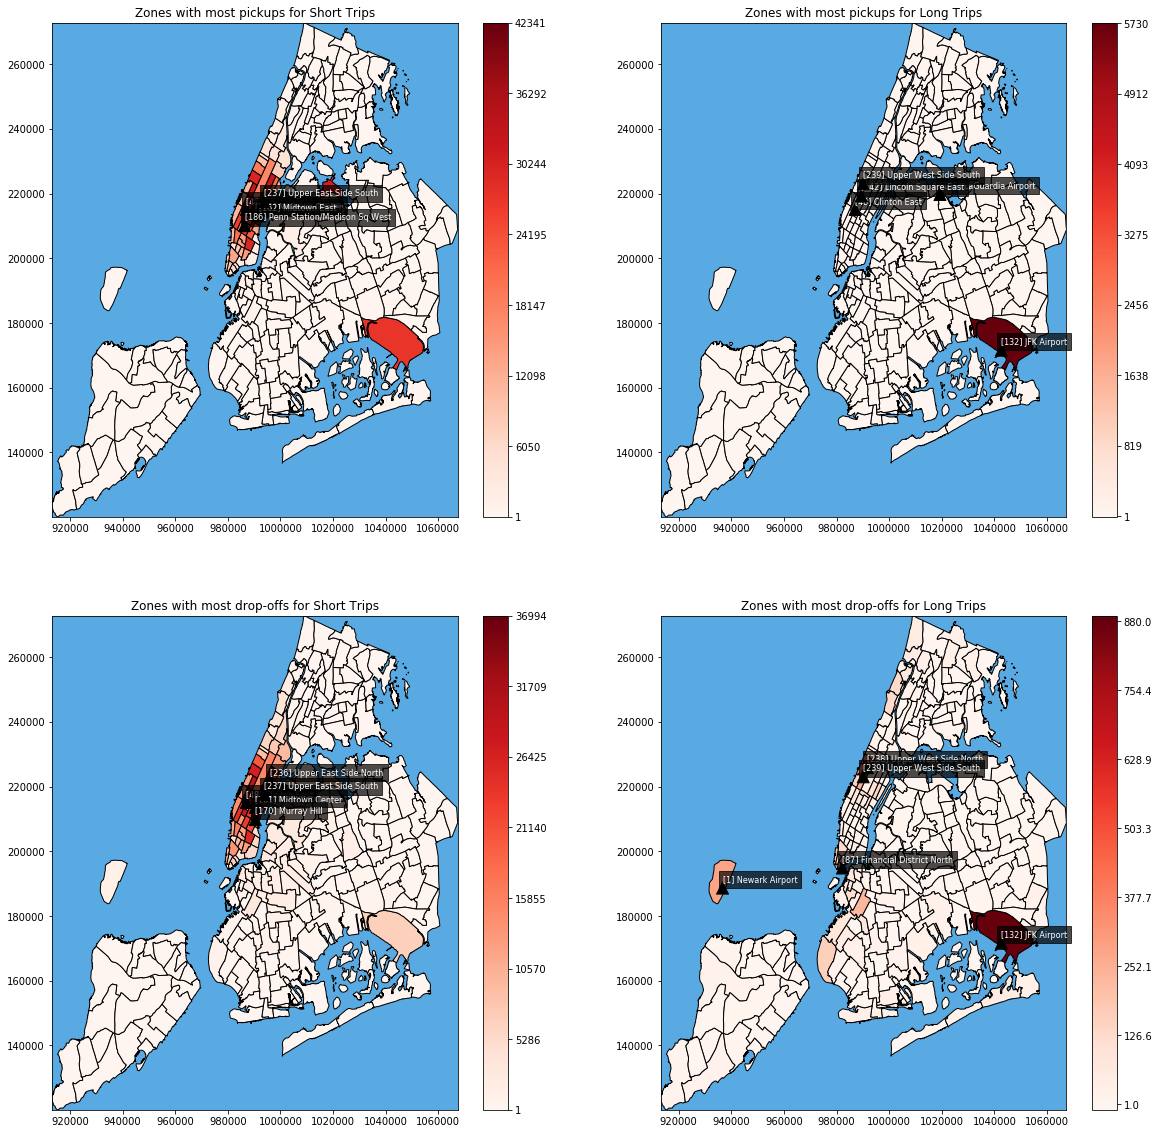

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax = plt.subplot(2, 2, 1)
ax.set_title("Zones with most pickups for Short Trips")
draw_zone_map(ax, taxiZones, heat=puCountShort, text=puTop5Short.index.tolist())
ax = plt.subplot(2, 2, 2)
ax.set_title("Zones with most pickups for Long Trips")
draw_zone_map(ax, taxiZones, heat=puCountLong, text=puTop5Long.index.tolist())
ax = plt.subplot(2, 2, 3)
ax.set_title("Zones with most drop-offs for Short Trips")
draw_zone_map(ax, taxiZones, heat=doCountShort, text=doTop5Short.index.tolist())
ax = plt.subplot(2, 2, 4)
ax.set_title("Zones with most drop-offs for Long Trips")
draw_zone_map(ax, taxiZones, heat=doCountLong, text=doTop5Long.index.tolist())